In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amishra527","key":"e6a0be7740ec70d5c659365ce7ce8034"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17052  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10323  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4773  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3745  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d gauthamp10/google-playstore-apps

 97% 201M/207M [00:07<00:00, 20.5MB/s]
100% 207M/207M [00:07<00:00, 29.2MB/s]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
!pip install CurrencyConverter
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from keras.layers import Dense,BatchNormalization,Flatten
from keras.models import Sequential
import keras
from keras.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

     |████████████████████████████████| 532 kB 4.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
playstore = pd.read_csv("/content/google-playstore-apps.zip",parse_dates=['Last Updated','Released'])
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
playstore.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [ ]:
playstore.describe(include='O')

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy,Scraped Time
count,2312942,2312944,2312944,2312837,2312809,2312748,2306414,2312911,1552109,2312913,2312944,1891991,2312944
unique,2177944,2312944,48,22,15,1657,154,758371,810440,950456,6,977743,67374
top,Tic Tac Toe,com.edvard.namazovozo,Education,100+,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,Everyone,http://www.subsplash.com/legal/privacy,2021-06-16 06:31:44
freq,382,1,241090,443368,2311548,74777,604465,5422,7519,10345,2022089,7481,56


In [ ]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [ ]:
playstore.drop(['App Id','Developer Website','Developer Email','Developer Id','Privacy Policy'],axis=1,inplace=True)
playstore.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020-05-21,2021-05-06,Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018-09-10,2018-10-13,Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020-02-21,2018-11-12,Everyone,False,False,False,2021-06-15 20:19:35


The least important columns like App Id, Developer Website,etc are deleted

Train test spliting of data

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(playstore,test_size=0.15,random_state=42)

Dealing with missing values

In [ ]:
for col in train_data.columns:
    null=train_data[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

App Name have 2   null value
Category have 0   null value
Rating have 19445   null value
Rating Count have 19445   null value
Installs have 89   null value
Minimum Installs have 89   null value
Maximum Installs have 0   null value
Free have 0   null value
Price have 0   null value
Currency have 114   null value
Size have 167   null value
Minimum Android have 5540   null value
Released have 60408   null value
Last Updated have 0   null value
Content Rating have 0   null value
Ad Supported have 0   null value
In App Purchases have 0   null value
Editors Choice have 0   null value
Scraped Time have 0   null value


In [ ]:
train_data.fillna(method='bfill',inplace=True)

Categorical type columns

In [ ]:
categorical_columns=[]
for col in train_data.columns:
    if train_data[col].dtype=='O':
        categorical_columns.append(col)
categorical_columns

['App Name',
 'Category',
 'Installs',
 'Currency',
 'Size',
 'Minimum Android',
 'Content Rating',
 'Scraped Time']

Installs

In [ ]:
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

train_data['Installs']=train_data['Installs'].apply(string_to_numeric)

[]

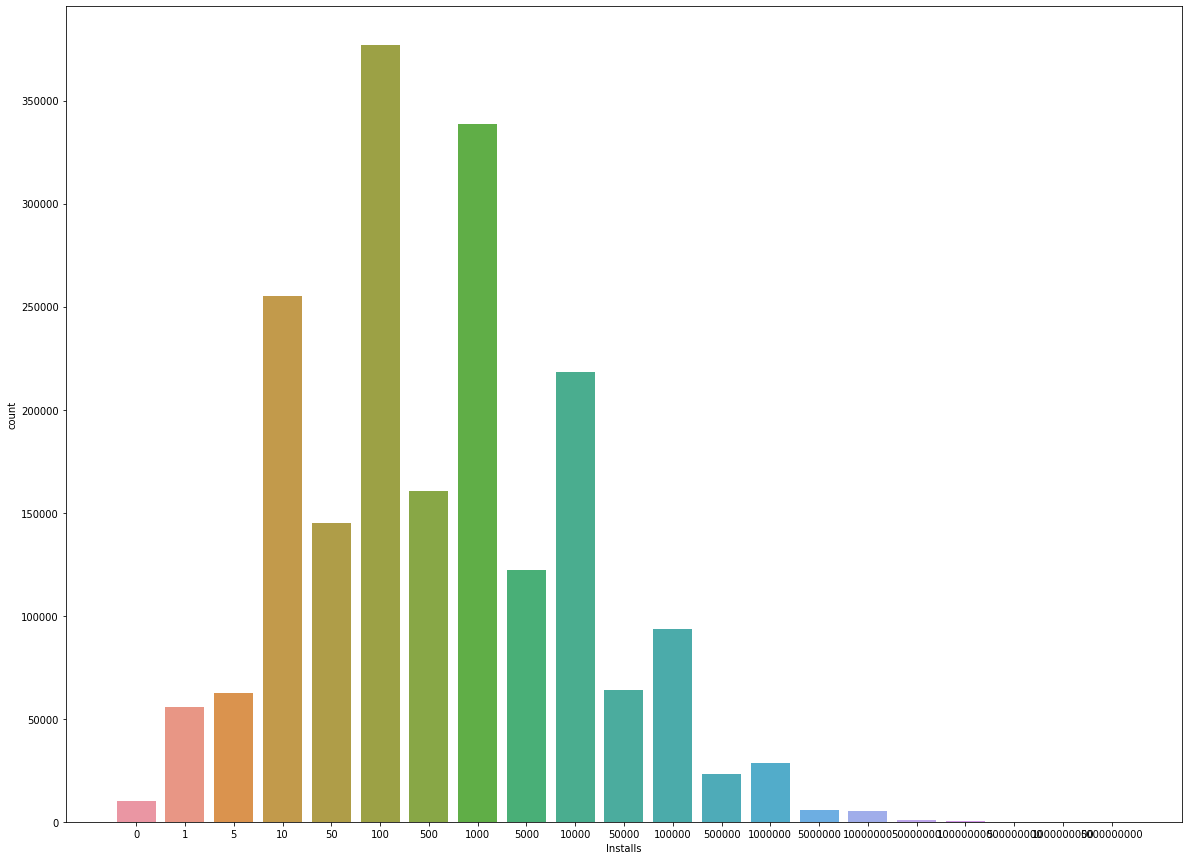

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Installs'])
plt.plot()

Size of App

In [ ]:
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

[link text](https:// [link text](https://))Function to convert every size of App to kb.

In [ ]:
train_data['Size']=train_data['Size'].apply(define_size)

[]

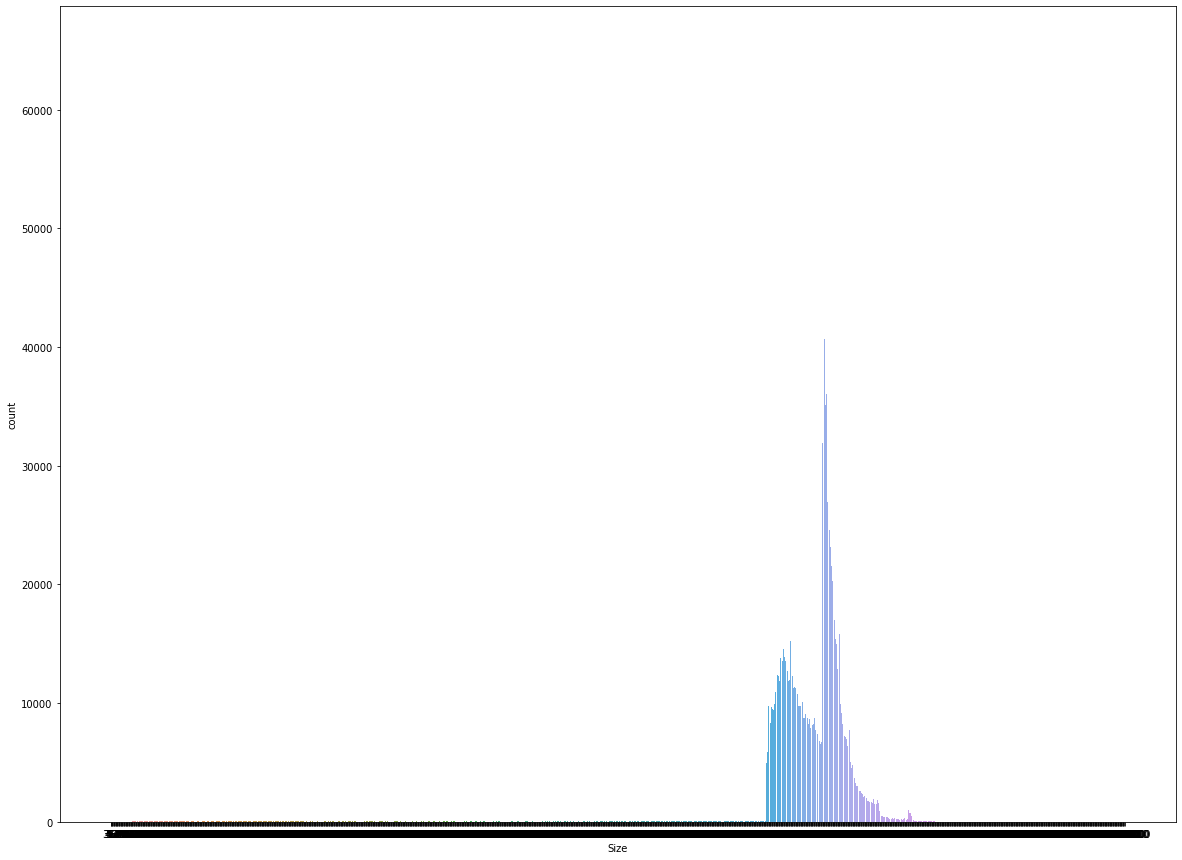

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Size'])
plt.plot()

[]

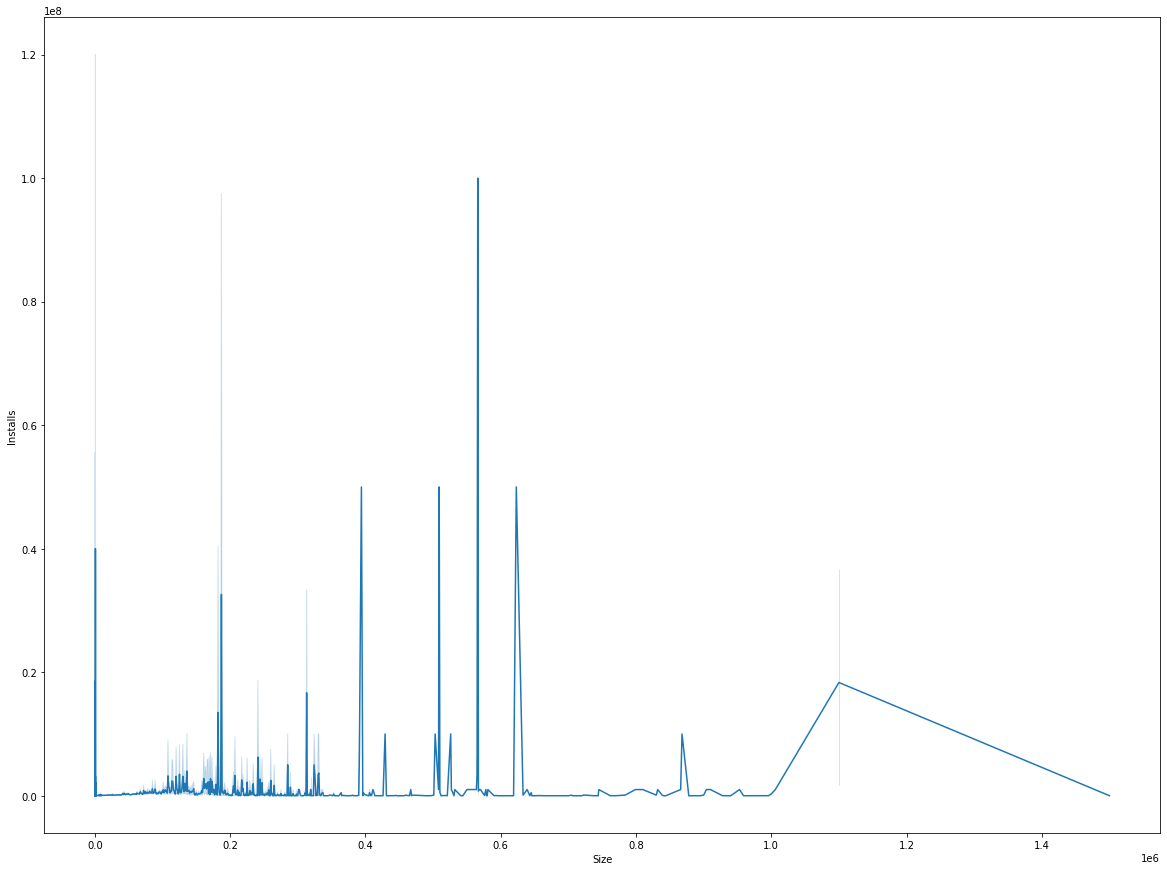

In [ ]:
plt.figure(figsize=(20,15))
sns.lineplot(train_data['Size'],train_data['Installs'])
plt.plot()

Content Rating

In [ ]:
train_data['Content Rating'].value_counts()

Everyone           1718721
Teen                166990
Mature 17+           51095
Everyone 10+         28952
Unrated                125
Adults only 18+        119
Name: Content Rating, dtype: int64

[]

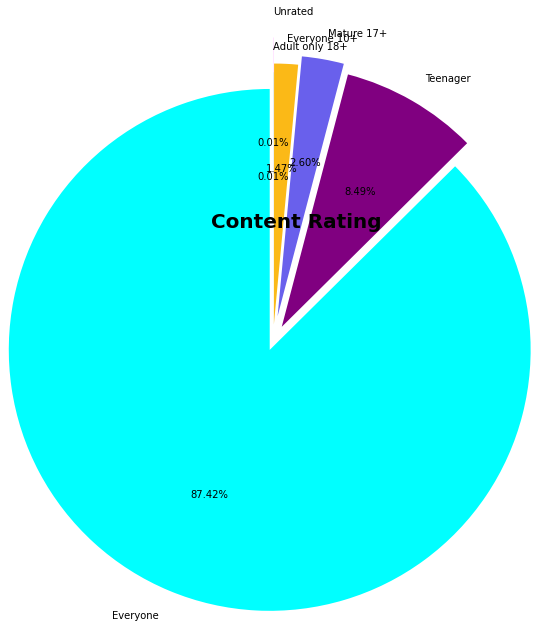

In [ ]:
plt.pie(train_data['Content Rating'].value_counts(),explode=[0.1,0.2,0.3,0.2,0.5,0.1],autopct='%0.2f%%',
        labels=['Everyone','Teenager','Mature 17+','Everyone 10+','Unrated','Adult only 18+'],startangle=90,radius=3,
       colors=['#00ffff','#800080','#6960ec','#fbb917','#ff00ff','#00ff00'])
plt.title('Content Rating',fontdict={'size':20,'weight':'bold'},loc='right')
plt.plot()

[]

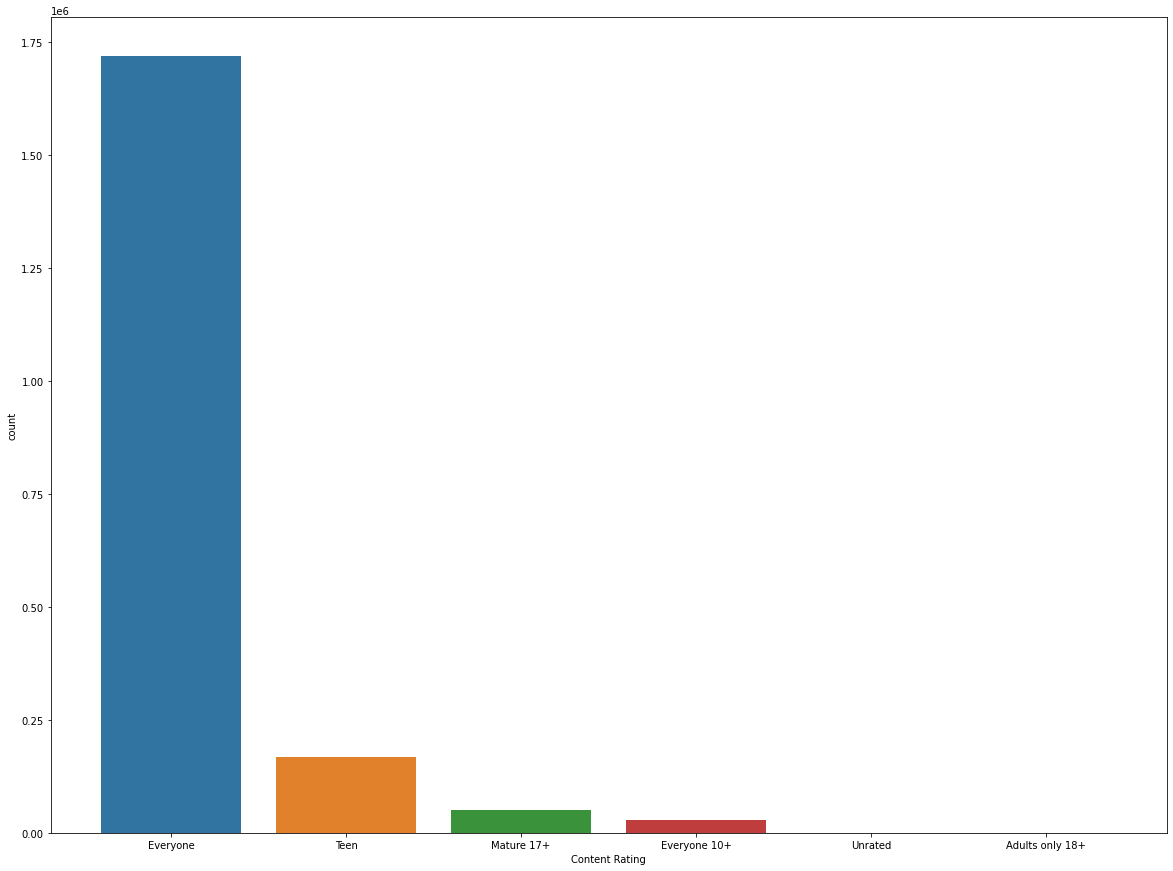

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Content Rating'])
plt.plot()

In [ ]:
lbl_content_rating=LabelEncoder()
train_data['Content Rating']=lbl_content_rating.fit_transform(train_data['Content Rating'])

Minimum Android Version

In [ ]:
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
train_data['Minimum Android']=train_data['Minimum Android'].apply(min_android)

[]

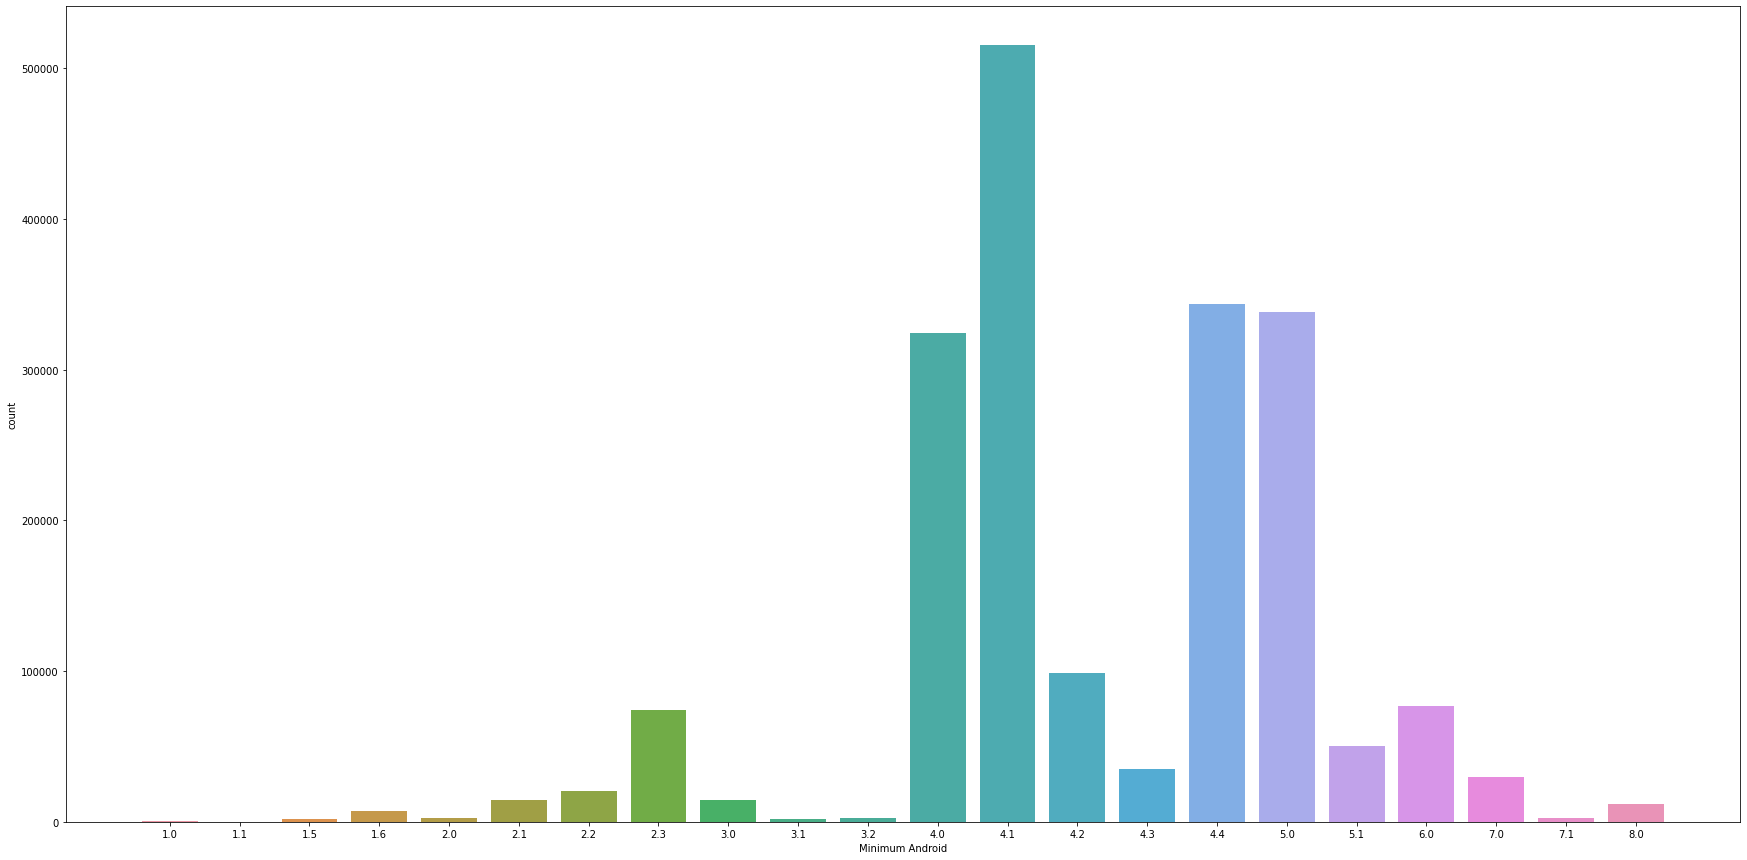

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(train_data['Minimum Android'])
plt.plot()

Categories Of App

In [ ]:
train_data['Category'].value_counts()

Education                  204768
Music & Audio              131634
Tools                      122394
Business                   122357
Entertainment              117686
Lifestyle                  100706
Books & Reference           99361
Personalization             75735
Health & Fitness            71014
Productivity                67606
Shopping                    64045
Food & Drink                62898
Travel & Local              57048
Finance                     55783
Arcade                      45687
Puzzle                      43463
Casual                      43321
Communication               40960
Sports                      40434
Social                      37987
News & Magazines            36361
Photography                 30306
Medical                     27245
Action                      23394
Maps & Navigation           22650
Simulation                  19750
Adventure                   19717
Educational                 18048
Art & Design                15749
Auto & Vehicle

[]

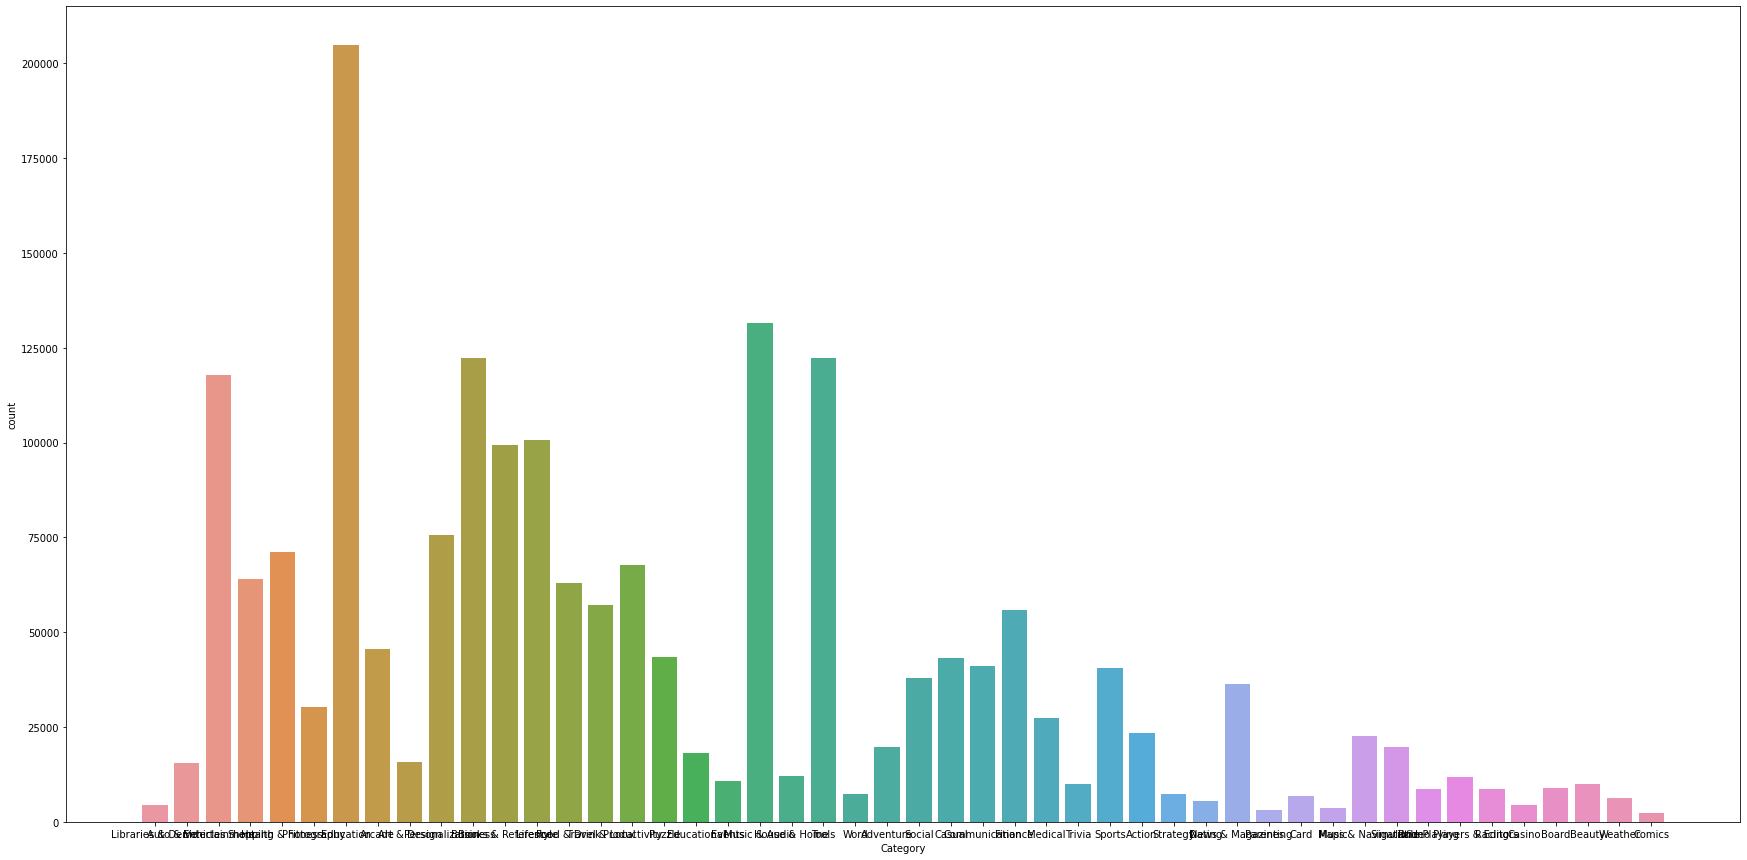

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(train_data['Category'])
plt.plot()

In [ ]:
lbl_category=LabelEncoder()
train_data['Category']=lbl_category.fit_transform(train_data['Category'])

Currency

In [ ]:
cc=CurrencyConverter()


def currency_to_INR(data):
    if data not in cc.currencies:
        data=1
    else:
        data=cc.convert(1,data,'INR')
    return data

In [ ]:
train_data['Currency']=train_data['Currency'].apply(currency_to_INR)

In [ ]:
train_data.Price=train_data.Price*train_data.Currency
train_data.Price.value_counts()

0.000000       1927866
74.702488        10028
150.159547        4951
225.616606        3319
112.431018        3170
                ...   
359.930171           1
314.655936           1
378.039865           1
1682.130259          1
3942.631329          1
Name: Price, Length: 977, dtype: int64

Multipling Price Column with currency to get the actual Price in INR

Boolean Columns

In [ ]:
bln=[]
for col in train_data.columns:
    if train_data[col].dtype=='bool':
        bln.append(col)
bln

['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']

Is App is Free?

In [ ]:
train_data.Free.value_counts()

True     1927752
False      38250
Name: Free, dtype: int64

[]

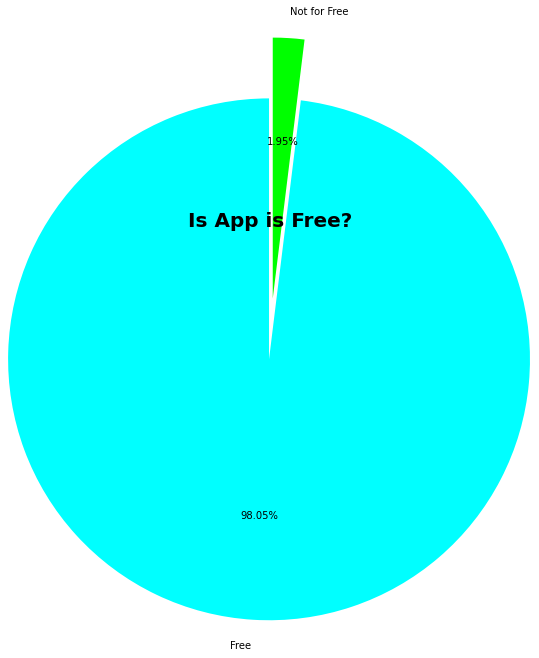

In [ ]:
plt.pie(train_data.Free.value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#00ffff','#00ff00'],labels=['Free','Not for Free'],
        startangle=90)
plt.title('Is App is Free?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
train_data.Free=pd.Categorical(train_data.Free,ordered=True,categories=[False,True]).codes

Is App is Ad Supported?

[]

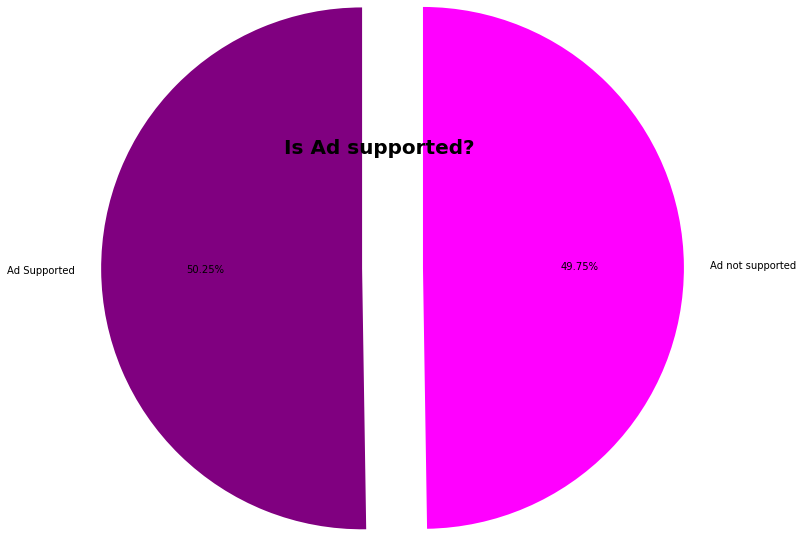

In [ ]:
plt.pie(train_data['Ad Supported'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#800080','#ff00ff'],labels=['Ad Supported','Ad not supported'],
        startangle=90)
plt.title('Is Ad supported?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
train_data['Ad Supported']=pd.Categorical(train_data['Ad Supported'],ordered=True,categories=[False,True]).codes

Is App is In Purchases?

In [ ]:
train_data['In App Purchases'].value_counts()

False    1799967
True      166035
Name: In App Purchases, dtype: int64

[]

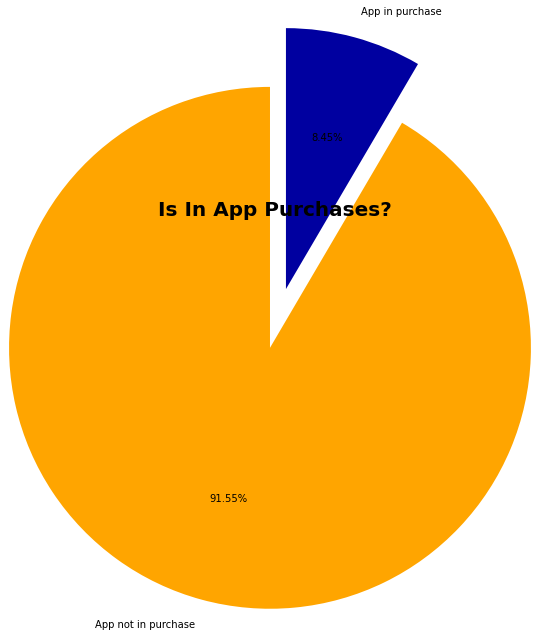

In [ ]:
plt.pie(train_data['In App Purchases'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#ffa500','#0000a0'],labels=['App not in purchase','App in purchase'],
        startangle=90)
plt.title('Is In App Purchases?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
train_data['In App Purchases']=pd.Categorical(train_data['In App Purchases'],ordered=True,categories=[False,True]).codes

Editors Choice

In [ ]:
train_data['Editors Choice'].value_counts()

False    1965282
True         720
Name: Editors Choice, dtype: int64

[]

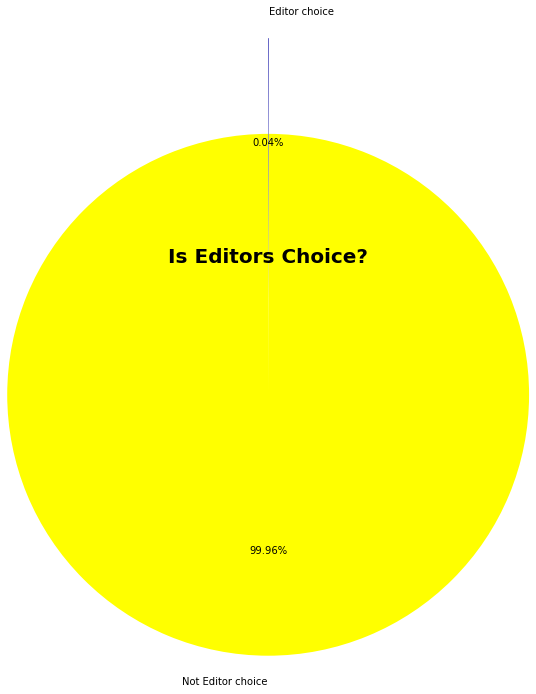

In [ ]:
plt.pie(train_data['Editors Choice'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.9],colors=['#ffff00','#0000a0'],labels=['Not Editor choice','Editor choice'],
        startangle=90)
plt.title('Is Editors Choice?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
train_data['Editors Choice']=pd.Categorical(train_data['Editors Choice'],ordered=True,categories=[False,True]).codes

Released Date

In [ ]:
released_date_install=pd.concat([train_data['Installs'],train_data['Released']],axis=1)

[]

<Figure size 1080x864 with 0 Axes>

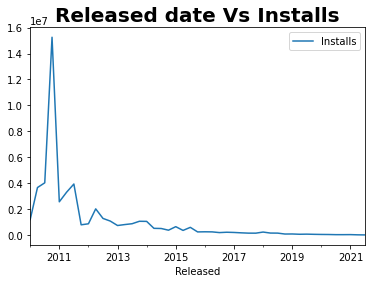

In [ ]:
plt.figure(figsize=(15,12))
released_date_plot=released_date_install.set_index('Released').resample('3M').mean()
released_date_plot.plot()
plt.title('Released date Vs Installs',fontdict={'size':20,'weight':'bold'})
plt.plot()

[]

<Figure size 1080x720 with 0 Axes>

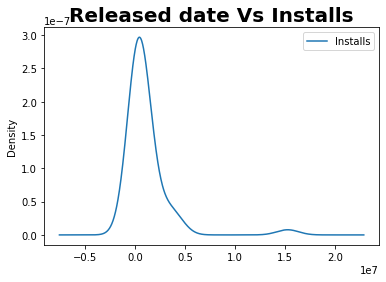

In [ ]:
plt.figure(figsize=(15,10))
released_date_plot.plot(kind='kde')
plt.title('Released date Vs Installs',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
released_date_rating=pd.concat([train_data['Rating'],train_data['Released']],axis=1)

[]

<Figure size 1080x864 with 0 Axes>

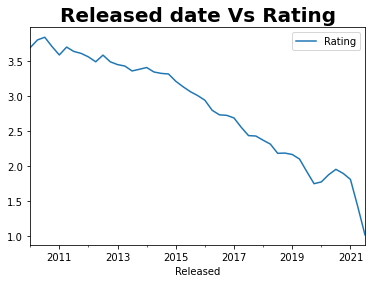

In [ ]:
plt.figure(figsize=(15,12))
released_date_rating_plot=released_date_rating.set_index('Released').resample('3M').mean()
released_date_rating_plot.plot()
plt.title('Released date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

[]

<Figure size 1080x720 with 0 Axes>

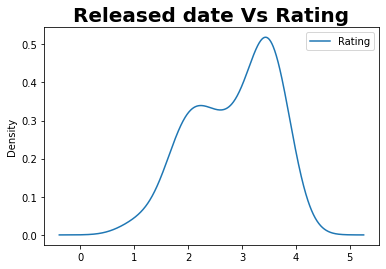

In [ ]:
plt.figure(figsize=(15,10))
released_date_rating_plot.plot(kind='kde')
plt.title('Released date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

Last Updated Date

In [ ]:
last_update_install=pd.concat([train_data['Installs'],train_data['Last Updated']],axis=1)

[]

<Figure size 1080x864 with 0 Axes>

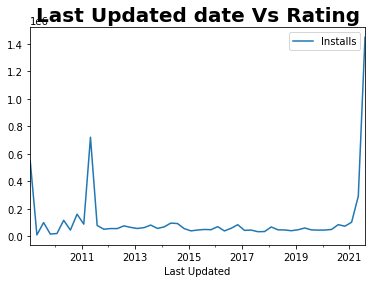

In [ ]:
plt.figure(figsize=(15,12))
update_date_install_plot=last_update_install.set_index('Last Updated').resample('3M').mean()
update_date_install_plot.plot()
plt.title('Last Updated date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

[]

<Figure size 1080x720 with 0 Axes>

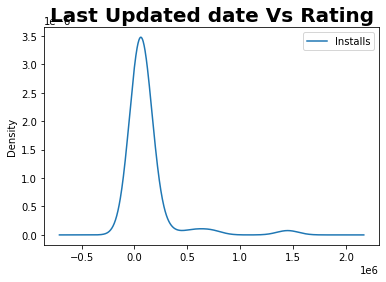

In [ ]:
plt.figure(figsize=(15,10))
update_date_install_plot.plot(kind='kde')
plt.title('Last Updated date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
updated_date_rating=pd.concat([train_data['Rating'],train_data['Last Updated']],axis=1)

[]

<Figure size 1080x864 with 0 Axes>

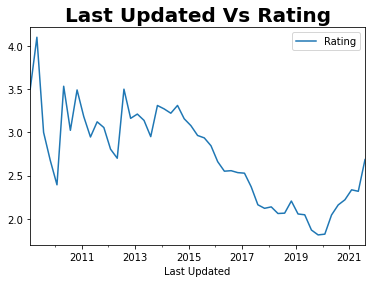

In [ ]:
plt.figure(figsize=(15,12))
updated_date_rating_plot=updated_date_rating.set_index('Last Updated').resample('3M').mean()
updated_date_rating_plot.plot()
plt.title('Last Updated Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

[]

<Figure size 1080x720 with 0 Axes>

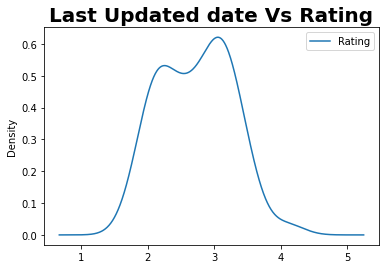

In [ ]:
plt.figure(figsize=(15,10))
updated_date_rating_plot.plot(kind='kde')
plt.title('Last Updated date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [ ]:
train_data.drop(['Released','Last Updated','Currency'],inplace=True,axis=1)

In [ ]:
train_data.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1000951,DittoBox,23,0.0,0.0,100,100.0,127,1,0.0,5900.0,5.0,1,0,0,0,2021-06-16 12:19:42
318931,Kenteken App,4,3.3,42.0,10000,10000.0,19953,1,0.0,3200.0,4.4,1,1,0,0,2021-06-16 01:47:51
1064309,Pleio Cloud Gaming - Jeux vidéo illimité en ligne,17,3.9,23.0,1000,1000.0,1836,1,0.0,1000.0,5.0,4,0,0,0,2021-06-16 13:20:42
330122,Atlanta Art and Antique Gallery,37,0.0,0.0,10,10.0,25,1,0.0,36000.0,4.1,1,0,0,0,2021-06-16 01:58:39
2226986,أسرار زيادة الوزن بسرعة في أسبوع ل جسم مثالي,21,4.1,7700.0,1000000,1000000.0,1438567,1,0.0,7300.0,4.1,4,1,0,0,2021-06-16 11:43:58


[]

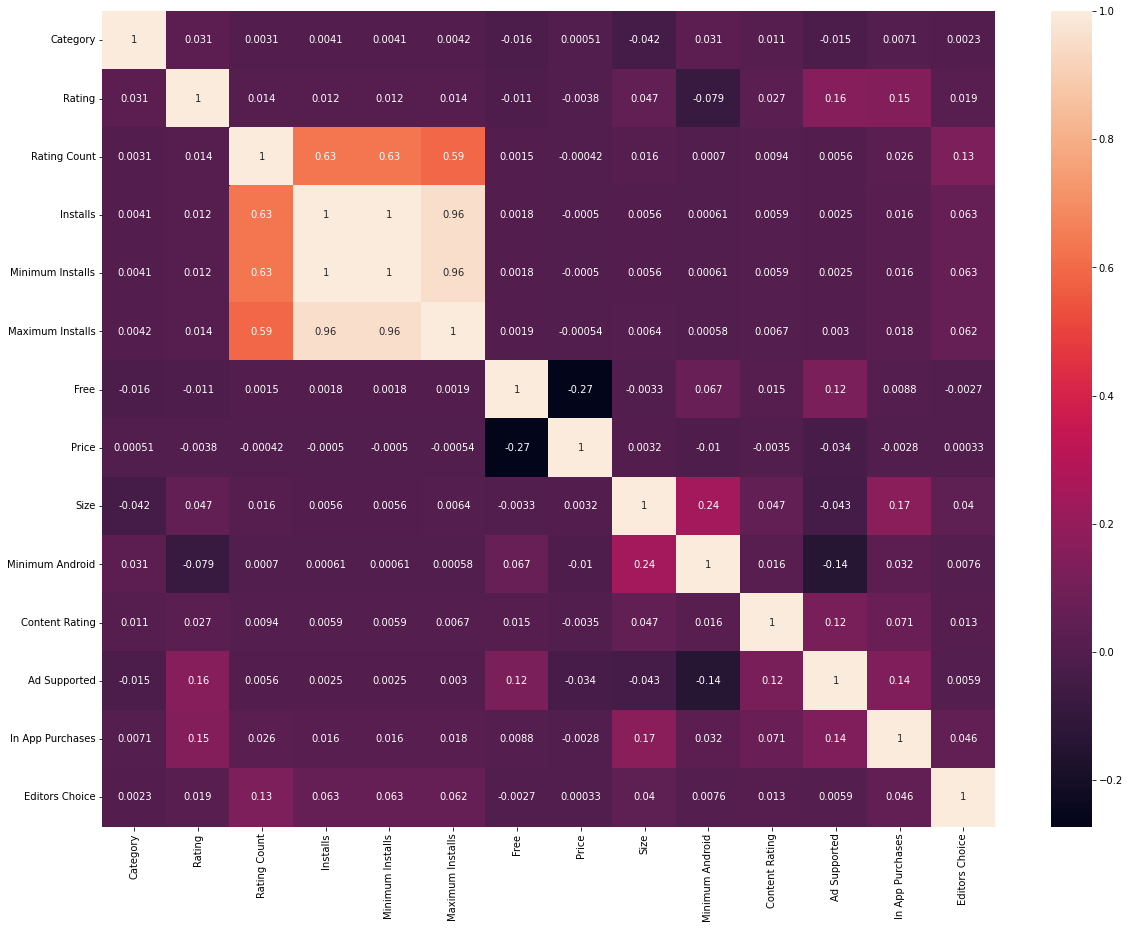

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.plot()

Cleaning Test Data

In [ ]:
test_data.fillna(method='bfill',inplace=True)

In [ ]:
test_data['Installs']=test_data['Installs'].apply(string_to_numeric)
test_data['Category']=lbl_category.transform(test_data['Category'])
test_data['Content Rating']=lbl_content_rating.transform(test_data['Content Rating'])
test_data['Minimum Android']=test_data['Minimum Android'].apply(min_android)
test_data['Size']=test_data['Size'].apply(define_size)
test_data['Currency']=test_data['Currency'].apply(currency_to_INR)
test_data['Editors Choice']=pd.Categorical(test_data['Editors Choice'],ordered=True,categories=[False,True]).codes
test_data['In App Purchases']=pd.Categorical(test_data['In App Purchases'],ordered=True,categories=[False,True]).codes
test_data['Ad Supported']=pd.Categorical(test_data['Ad Supported'],ordered=True,categories=[False,True]).codes
test_data['Free']=pd.Categorical(test_data['Free'],ordered=True,categories=[False,True]).codes
test_data['Price']=test_data['Price']*test_data['Currency']
test_data.drop(['Released','Last Updated','Currency'],inplace=True,axis=1)

AttributeError: ignored

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346942 entries, 1843548 to 362688
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          346942 non-null  object 
 1   Category          346942 non-null  int64  
 2   Rating            346942 non-null  float64
 3   Rating Count      346942 non-null  float64
 4   Installs          346942 non-null  int64  
 5   Minimum Installs  346942 non-null  float64
 6   Maximum Installs  346942 non-null  int64  
 7   Free              346942 non-null  int8   
 8   Price             346942 non-null  float64
 9   Size              346942 non-null  float64
 10  Minimum Android   346942 non-null  float64
 11  Content Rating    346942 non-null  int64  
 12  Ad Supported      346942 non-null  int8   
 13  In App Purchases  346942 non-null  int8   
 14  Editors Choice    346942 non-null  int8   
 15  Scraped Time      346942 non-null  object 
dtypes: float64(6),

In [ ]:
y_test=test_data.iloc[:,2]
x_test=test_data.drop(['Rating','Minimum Installs','Maximum Installs','App Name'],axis=1)


y_train=train_data.iloc[:,2]
x_train=train_data.drop(['Rating','Minimum Installs','Maximum Installs','App Name'],axis=1)

Model Selection

Linear Regression

In [ ]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
print('r2_score of training data',r2_score(model_1.predict(x_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_1.predict(x_test).round(1),y_test))

ValueError: ignored

In [ ]:
print('mean absolute error of training data',mean_absolute_error(model_1.predict(x_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_1.predict(x_test).round(1),y_test))

Decision Tree Regression

In [ ]:
model_2=DecisionTreeRegressor(max_depth=9)
model_2.fit(x_train,y_train)
print('r2_score of training data',r2_score(model_2.predict(x_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_2.predict(x_test).round(1),y_test))

In [ ]:
print('mean absolute error of training data',mean_absolute_error(model_2.predict(x_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_2.predict(x_test).round(1),y_test))

Random Forest Regression

In [ ]:
model_3=RandomForestRegressor(max_depth=9)
model_3.fit(x_train,y_train)
print('r2_score of training data',r2_score(model_3.predict(x_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_3.predict(x_test).round(1),y_test))

In [ ]:
print('mean absolute error of training data',mean_absolute_error(model_3.predict(x_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_3.predict(x_test).round(1),y_test))

XGBRegression

In [ ]:
from xgboost import XGBRegressor
model_4=XGBRegressor()
model_4.fit(x_train,y_train)
print('r2_score of training data',r2_score(model_4.predict(x_train).round(1),y_train))
print('r2_score of testing data',r2_score(model_4.predict(x_test).round(1),y_test))

In [ ]:
print('mean absolute error of training data',mean_absolute_error(model_4.predict(x_train).round(1),y_train))
print('mean absolute error of testing data',mean_absolute_error(model_4.predict(x_test).round(1),y_test))

ANN

In [ ]:
model_5=Sequential()
model_5.add(Dense(1,input_shape=x_train.shape))

In [ ]:
model_5.compile(optimizer=keras.optimizers.RMSprop(.001),loss='mse',metrics=[keras.metrics.mean_absolute_error])
r=model_5.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=100)

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [ ]:
print('r2_score of training data',r2_score(model_5.predict(x_train),y_train))
print('r2_score of testing data',r2_score(model_5.predict(x_test),y_test))

Conclusion

Here it is found that XG Boost and Random Forest are some of the better techniques that could be used to predict output.